# Shanghai Rankings Exploring Relationships

## 1. Importing Libraries and cleaned dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

### Importing combined dataset

In [2]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [3]:
# Import dataset

df_shanghai = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'shanghai_cleaned_final.csv'))

In [4]:
# Check to see if dataset was imported properly

df_shanghai

,Unnamed: 0,world_rank_Shanghai,university_name,national_rank,overall_score_Shanghai,alumni_score,award_score,hici_score,ns_score,publication_score,pcp_score,year
0,0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
4890,4892,401-500,University of Trieste,11-20,NaN,0.0,0.0,5.0,10.9,25.1,20.1,2015
4891,4893,401-500,University of Zaragoza,9-13,NaN,0.0,0.0,7.6,5.1,33.3,13.1,2015
4892,4894,401-500,Utah State University,126-146,NaN,13.6,0.0,3.6,10.8,25.1,15.5,2015
4893,4895,401-500,Vienna University of Technology,4-6,NaN,0.0,0.0,0.0,12.2,28.8,22.9,2015


In [5]:
df_shanghai.shape

(4895, 12)

## 2. Use the questions from the previous exercise to pick out variables suitable for the exploratory visual analysis

#### The goal for this visual analysis is to see which factor(s) correlate most strongly with high university rankings (the world_rank_Times column)

In [6]:
# Check datatypes of the columns. Correlations will only work with numerical columns

df_shanghai.dtypes

Unnamed: 0                  int64
world_rank_Shanghai        object
university_name            object
national_rank              object
overall_score_Shanghai    float64
alumni_score              float64
award_score               float64
hici_score                float64
ns_score                  float64
publication_score         float64
pcp_score                 float64
year                        int64
dtype: object

In [7]:
# Drop the 'Unnamed: 0' column as this was an automatically generated index column

df_shanghai = df_shanghai.drop(columns = ['Unnamed: 0'])

In [8]:
# Can drop the 'university name' and 'national_rank' columns for this since they are object columns
# For the numerical columns, the 'overall_score_Shanghai', and 'year' columns can be omitted.
# Create a subset that does not include these 4 columns

df_shanghai_sub1 = df_shanghai.drop(columns = ['university_name', 'national_rank', 'overall_score_Shanghai', 'year'])

df_shanghai_sub1

,world_rank_Shanghai,alumni_score,award_score,hici_score,ns_score,publication_score,pcp_score
0,1,100.0,100.0,100.0,100.0,100.0,72.4
1,2,99.8,93.4,53.3,56.6,70.9,66.9
2,3,41.1,72.2,88.5,70.9,72.3,65.0
3,4,71.8,76.0,69.4,73.9,72.2,52.7
4,5,74.0,80.6,66.7,65.8,64.3,53.0
...,...,...,...,...,...,...,...
4890,401-500,0.0,0.0,5.0,10.9,25.1,20.1
4891,401-500,0.0,0.0,7.6,5.1,33.3,13.1
4892,401-500,13.6,0.0,3.6,10.8,25.1,15.5
4893,401-500,0.0,0.0,0.0,12.2,28.8,22.9


### ** Analysis in the next major steps has been performed with all of the universities regardless of rank. However, this has led to too many data points in scatterplots, pairplots, and catplots and made graphs difficult to interpret. As a result, analysis will be performed with a subset of the data (top 100 universities per year). This is because after the 100th ranked university, the Shanghai rankings only gave a general range for the next universities (ex: 101-152) which made it impossible to assign world rankings. 

In [9]:
# Create a subset of the top 100 universities per year
# Check the size of the subset (should be 1201 rows only)

df_top100 = df_shanghai_sub1[~df_shanghai_sub1['world_rank_Shanghai'].str.contains("-")]

df_top100.shape

(1101, 7)

In [10]:
# Change datatype of the column to integers 

df_top100['world_rank_Shanghai'] = df_top100['world_rank_Shanghai'].astype('int')

df_top100.dtypes

C:\Users\HP\AppData\Local\Temp\ipykernel_16048\3057175655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top100['world_rank_Shanghai'] = df_top100['world_rank_Shanghai'].astype('int')


world_rank_Shanghai      int32
alumni_score           float64
award_score            float64
hici_score             float64
ns_score               float64
publication_score      float64
pcp_score              float64
dtype: object

## 3. Create a colored correlation matrix heatmap. Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [11]:
# Create a correlation matrix of the subset

df_top100.corr()

,world_rank_Shanghai,alumni_score,award_score,hici_score,ns_score,publication_score,pcp_score
world_rank_Shanghai,1.000000,-0.572141,-0.670591,-0.791032,-0.819060,-0.606051,-0.577886
alumni_score,-0.572141,1.000000,0.745999,0.480494,0.584310,0.359647,0.639318
award_score,-0.670591,0.745999,1.000000,0.550183,0.671199,0.197078,0.718257
hici_score,-0.791032,0.480494,0.550183,1.000000,0.874655,0.659382,0.553548
ns_score,-0.819060,0.584310,0.671199,0.874655,1.000000,0.626028,0.674305
publication_score,-0.606051,0.359647,0.197078,0.659382,0.626028,1.000000,0.220892
pcp_score,-0.577886,0.639318,0.718257,0.553548,0.674305,0.220892,1.000000


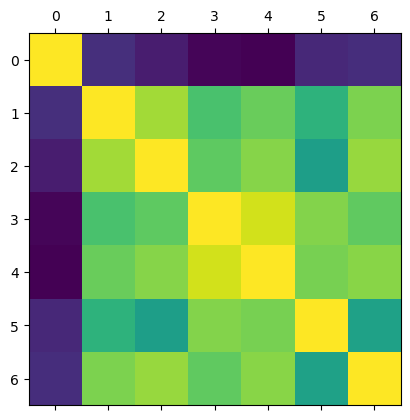

In [12]:
# Creating a correlation heatmap using matplotlib

plt.matshow(df_top100.corr())
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16048\2283125204.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() #set tight layout so figure doesn't get cut off when saving


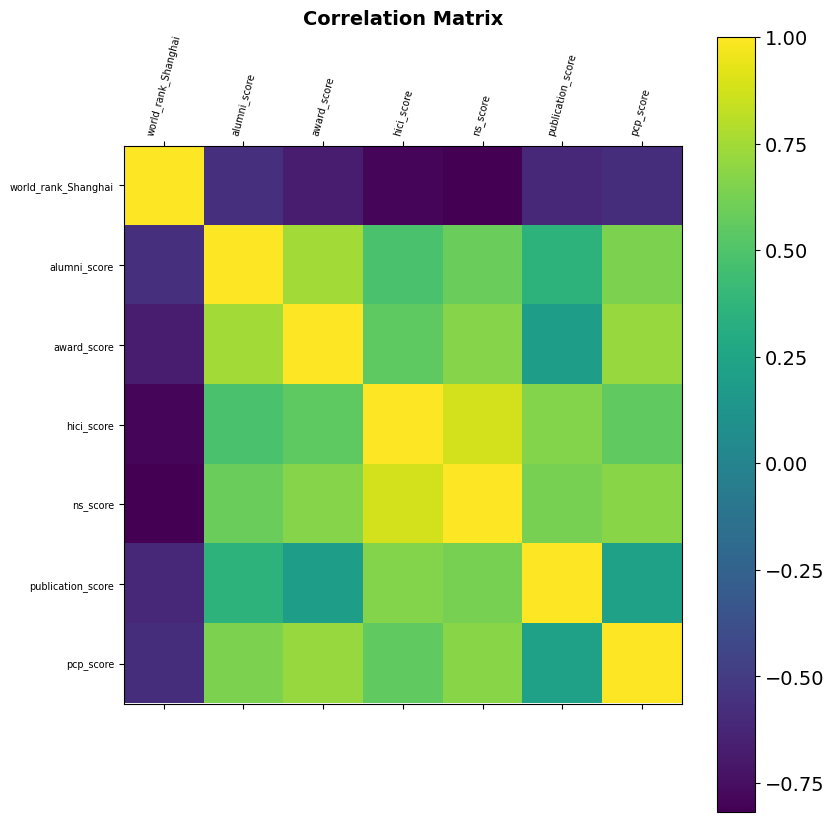

In [13]:
# Add labels, a legend, and change the size of the heatmap. Saving the figure to Visualizations folder. 

f = plt.figure(figsize=(9, 10)) # figure size 
plt.matshow(df_top100.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_top100.shape[1]), df_top100.columns, fontsize=7, rotation=75) # x axis labels
plt.yticks(range(df_top100.shape[1]), df_top100.columns, fontsize=7) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14, fontweight = 'bold') # add title
plt.tight_layout() #set tight layout so figure doesn't get cut off when saving

f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap_shanghai_top100_plt.png')) #save figure

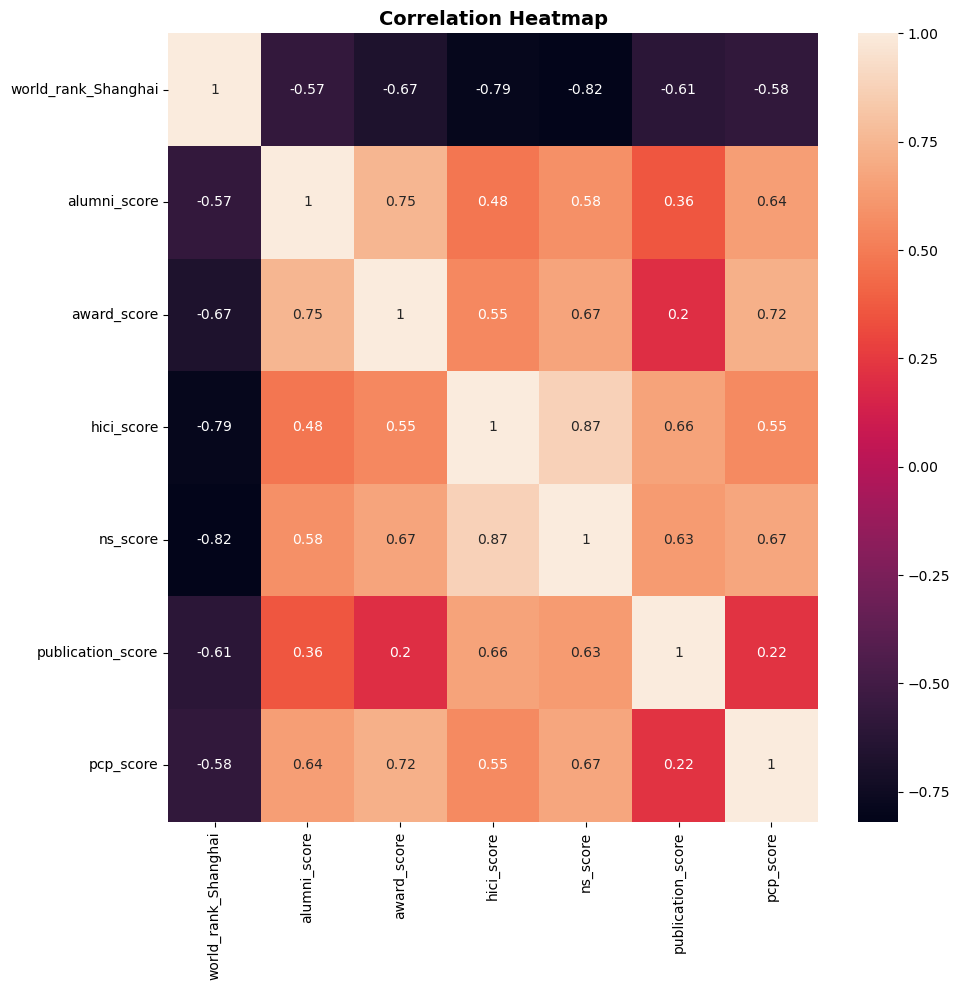

In [14]:
# Creating the same heatmap with seaborn instead of matplotlib

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_top100.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

ax.set_title( "Correlation Heatmap" , size = 14, fontweight = 'bold') #add title

plt.tight_layout() #set tight layout so figure doesn't get cut off when saving

f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap_shanghai_top100_sns.png')) #save figure


Higher numbers inside the pixels indicate higher correlation coefficients which indicate a stronger relationship between variables. However, it is important to note that a high correlation coefficient doesn't necessarily mean that the variables are linearly dependent on each other or even dependent on each other at all. 

Unlike the Times World University Rankings, the Shanghai Rankings correlate much more strongly to the factors given. The strongest factors that the Shanghai Rankings correlate to are the HiCi and NS scores. Some other factors seem to correlate with each other, such as Alumni score and Award score or HiCi score and NS score. These are likely due to some confounding factors that are not given in the dataset.


## 4. Create a scatterplot(s) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output.

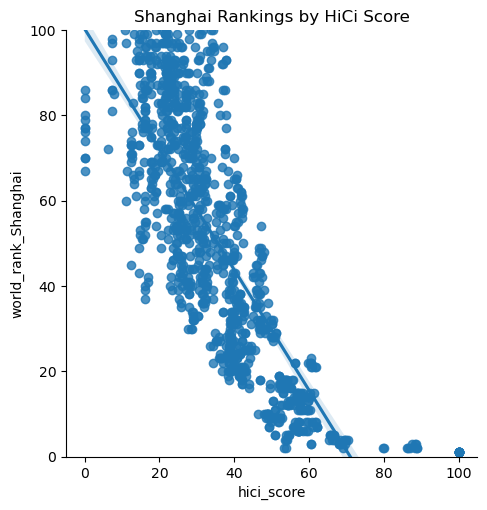

In [15]:
# Create a scatterplot for the "world_rank_Shanghai" and "hici_score" columns in seaborn
# Set the y-axis range since it goes into negative values for the world rankings which does not make sense

scat_1 = sns.lmplot(x = 'hici_score', y = 'world_rank_Shanghai', data = df_top100).set(title = 'Shanghai Rankings by HiCi Score')
scat_1.ax.set(ylim=(0, 100))

scat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_worldrank_hiciscore_Shanghai_top100.png'), bbox_inches="tight") #save figure

As seen in the figure above, while there was a correlation coefficient of -0.79 between the two variables, the scatterplot shows that the data is not necessarily linear. Nevertheless, there is a clear negative trend which is to be expected, since higher ranked universities should have low ranking numbers but very high HiCi scores. There are notable outliers with the top university having a score of 100, but this is because the HiCi scores are scaled based off the best university. 

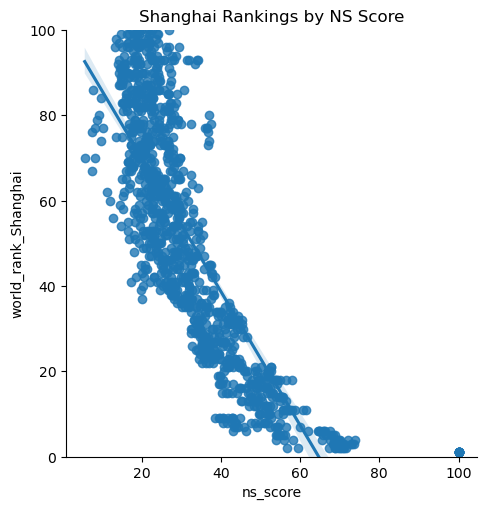

In [16]:
# Create a scatterplot for the "world_rank_Shanghai" and "ns_score" columns in seaborn

scat_2 = sns.lmplot(x = 'ns_score', y = 'world_rank_Shanghai', data = df_top100).set(title = 'Shanghai Rankings by NS Score')
scat_2.ax.set(ylim=(0, 100))

scat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_worldrank_NSscore_shanghai_top100.png'), bbox_inches="tight") #save figure

Compared to the previous figure, the correlation coefficient of -0.82 between these two variables showed a scatterplot with a slightly stronger general downward trend. The data appears to be clustered much more, with the main significant outlier appearing at the top university with a NS score of 100.

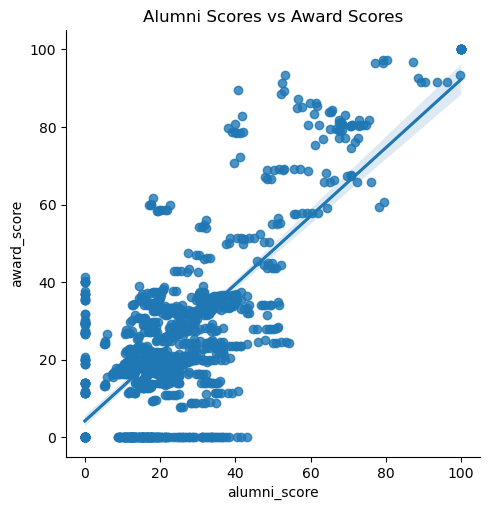

In [17]:
# Create a scatterplot for the "alumni_score" and "award_score" columns in seaborn

scat_3 = sns.lmplot(x = 'alumni_score', y = 'award_score', data = df_top100).set(title = 'Alumni Scores vs Award Scores')

scat_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_alumni_vs_award_Shanghai_top100.png'), bbox_inches="tight") #save figure

There is a general upward trend between the two, which suggests a confounding factor between the alumni scores and the award scores between universities. Interestingly, there are some universities that had zeroes in both categories and still made the top 100 universities every year. They were most likely upheld due to their scores in other categories and also because this ranking system favored universities with strong math and science backgrounds. 

## 5. Create a pair plot of the entire dataset. Comment on the distribution of the variables and mark variables you'd like to explore further with an explanation of why.

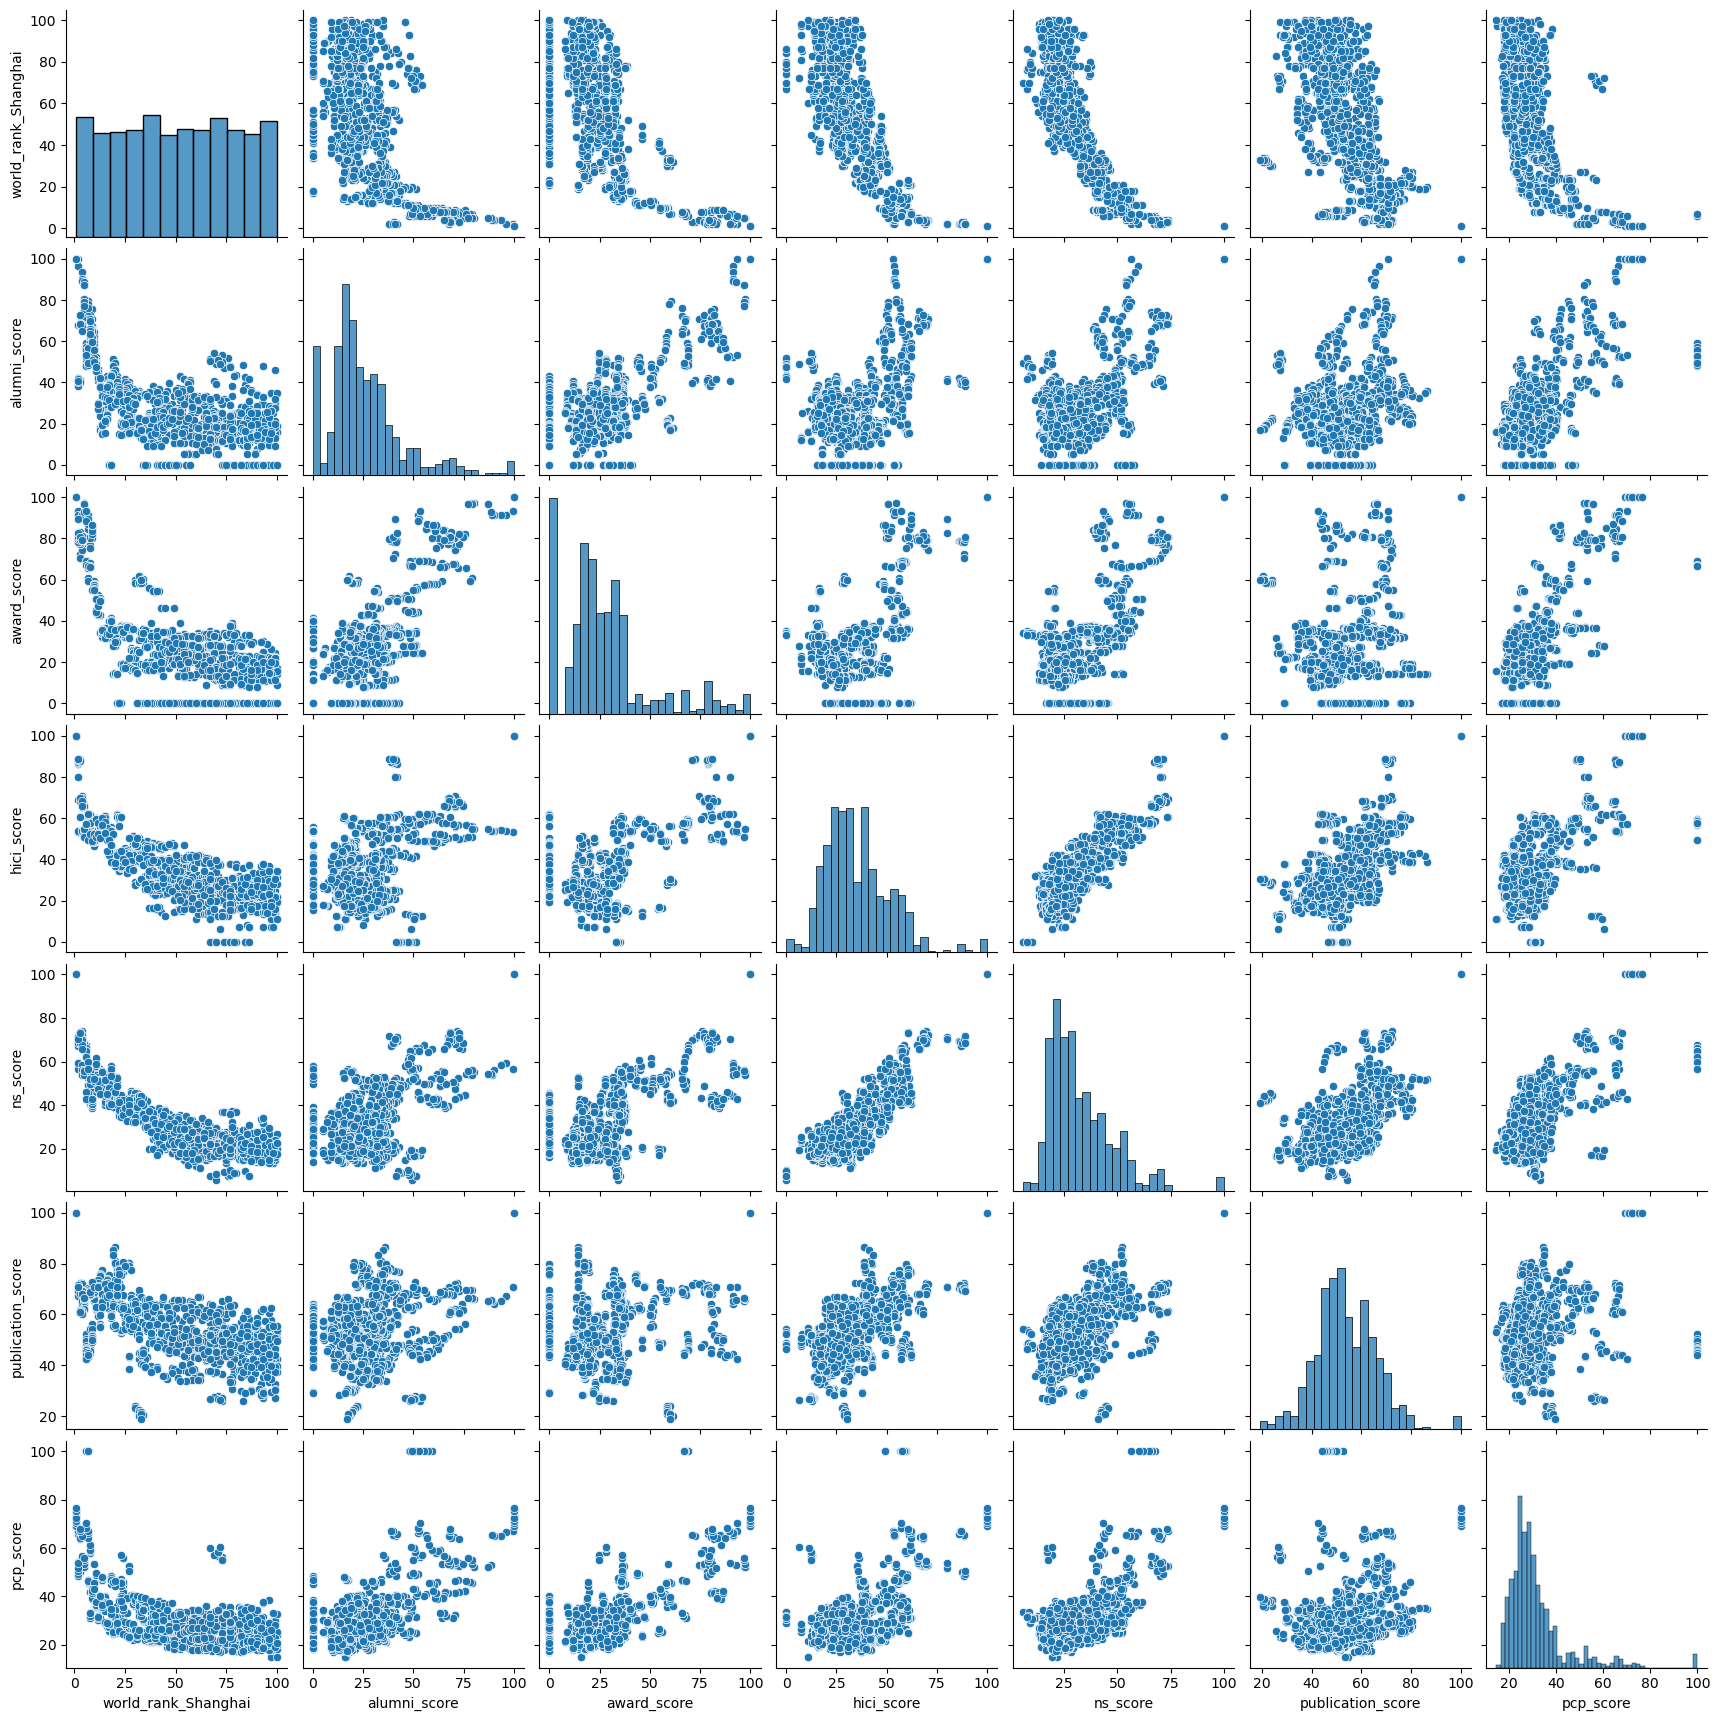

In [18]:
# Create a pair plot 

g = sns.pairplot(df_top100)

One significant thing that can be seen in the pairplots for this dataset compared to the pairplots for the other is that there are many values of "0" for the scores. This is due to the fact that the scores are scaled off of the top university per year (as can be seen in multiple plots there is an outlier with a score of "100" for the top university). 

Unlike the CWUR and Times datasets, many of the scatterplots for the top 100 universities in the Shanghai data are clustered due to the scaling and the sheer amount of datapoints. 

Some potential relationships to investigate in the future would be HiCi score and NS score, as there seems to be a relatively linear relationship between them, and PCP score and Award score. 

## 6. Create a categorical plot and interpret the results.

#### *** Since the current dataset does not have a country column, I will create a new country column. The values will be merged based on a dataset that does have country values (the Times Higher Education Rankings dataset).

In [19]:
# Import second dataset (Times dataset)

df_times = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'times_cleaned_final.csv'))

In [20]:
# Create a subset of the data that only includes the 'university_name' and 'country' columns
# Check column names to drop

df_times.dtypes

Unnamed: 0                       int64
world_rank_Times                object
university_name                 object
country                         object
teaching_score                 float64
international_outlook_score    float64
research_score                 float64
citations_score                float64
income_score                   float64
overall_score_Times            float64
num_students                   float64
student_staff_ratio            float64
international_students         float64
female_male_ratio               object
year                             int64
dtype: object

In [21]:
#Drop the columns and check that only 'university_name' and 'country' column remain

df_times_sub1 = df_times.drop(columns = ['Unnamed: 0', 'world_rank_Times', 'teaching_score', 'international_outlook_score',
                                         'research_score', 'citations_score', 'income_score', 'overall_score_Times',
                                         'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio',
                                         'year'])

df_times_sub1

,university_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America
...,...,...
2598,Yeungnam University,South Korea
2599,Yıldız Technical University,Turkey
2600,Yokohama City University,Japan
2601,Yokohama National University,Japan


In [22]:
# Check for duplicates

df_dups = df_times_sub1[df_times_sub1.duplicated()]
df_dups

,university_name,country
200,California Institute of Technology,United States of America
201,Harvard University,United States of America
202,Stanford University,United States of America
203,University of Oxford,United Kingdom
204,Princeton University,United States of America
...,...,...
2535,Polytechnic University of Valencia,Spain
2550,University of Seoul,South Korea
2589,University of Vigo,Spain
2592,Waseda University,Japan


In [23]:
# Create a subset with no duplicates. This will be the dataset that will be merged with the Shanghai data

df_no_dups = df_times_sub1.drop_duplicates()

df_no_dups

,university_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America
...,...,...
2597,Xidian University,China
2598,Yeungnam University,South Korea
2599,Yıldız Technical University,Turkey
2600,Yokohama City University,Japan


In [24]:
# Use merge() function with a left join to add the 'country' column to the Shanghai dataset

df_merged = df_shanghai.merge(df_no_dups, on = 'university_name', how = "left")

df_merged

,world_rank_Shanghai,university_name,national_rank,overall_score_Shanghai,alumni_score,award_score,hici_score,ns_score,publication_score,pcp_score,year,country
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,United States of America
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005,United Kingdom
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005,United States of America
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005,United States of America
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4890,401-500,University of Trieste,11-20,NaN,0.0,0.0,5.0,10.9,25.1,20.1,2015,Italy
4891,401-500,University of Zaragoza,9-13,NaN,0.0,0.0,7.6,5.1,33.3,13.1,2015,Spain
4892,401-500,Utah State University,126-146,NaN,13.6,0.0,3.6,10.8,25.1,15.5,2015,NaN
4893,401-500,Vienna University of Technology,4-6,NaN,0.0,0.0,0.0,12.2,28.8,22.9,2015,Austria


In [25]:
# Create a subset with only the top 100 universities per year (only include rows without the '-' in the world ranking)
df_top100_v2 = df_merged[~df_merged['world_rank_Shanghai'].str.contains("-")]

# Check for NaNs in the country column since it's possible that not everything got merged correctly
df_top100_v2['country'].value_counts(dropna = False)

United States of America    391
NaN                         386
United Kingdom               60
Canada                       44
Japan                        39
Sweden                       37
Netherlands                  27
Switzerland                  27
Australia                    20
Denmark                      19
Germany                      14
Norway                       11
Finland                      11
Belgium                       8
France                        6
Austria                       1
Name: country, dtype: int64

In [26]:
# There are 386 NaNs that must be resolved before analyzing based on country/region data
# Create a subset of the universities with missing countries to investigate further

df_missing = df_top100_v2[df_top100_v2['country'].isna()]

df_missing['university_name'].value_counts(dropna = False)

Massachusetts Institute of Technology (MIT)                      11
Pennsylvania State University - University Park                  11
King's College London                                            11
The Hebrew University of Jerusalem                               11
Purdue University - West Lafayette                               11
Moscow State University                                          11
University of Wisconsin - Madison                                11
The Ohio State University - Columbus                             11
The Australian National University                               11
The University of Manchester                                     11
Technical University Munich                                      11
University of Munich                                             11
The University of Edinburgh                                      11
Ecole Normale Superieure - Paris                                 11
Pierre and Marie  Curie University - Paris 6    

In [27]:
# Replace universities based on their missing countries in the df_top100_v2 dataframe
# Countries for these respective universities were found online

# Replace for Australian Universities
df_top100_v2.loc[(df_top100_v2['university_name'] == 'The Australian National University') | 
                 (df_top100_v2['university_name'] == 'The University of Western Australia') | 
                 (df_top100_v2['university_name'] == 'The University of Melbourne'), 'country'] = 'Australia'

# Replace for French Universities
df_top100_v2.loc[(df_top100_v2['university_name'] == 'Ecole Normale Superieure - Paris') | 
                 (df_top100_v2['university_name'] == 'Pierre and Marie  Curie University - Paris 6') | 
                 (df_top100_v2['university_name'] == 'University of Paris Sud (Paris 11)') |
                 (df_top100_v2['university_name'] == 'University of Paris-Sud (Paris 11)'), 'country'] = 'France'

# Replace for German Universities
df_top100_v2.loc[(df_top100_v2['university_name'] == 'Technical University Munich') | 
                 (df_top100_v2['university_name'] == 'University of Munich') | 
                 (df_top100_v2['university_name'] == 'University of Heidelberg') |
                 (df_top100_v2['university_name'] == 'University of Goettingen') |
                 (df_top100_v2['university_name'] == 'University of Frankfurt'), 'country'] = 'Germany'

# Replace for Israeli Universities
df_top100_v2.loc[(df_top100_v2['university_name'] == 'The Hebrew University of Jerusalem') | 
                 (df_top100_v2['university_name'] == 'Technion-Israel Institute of Technology') | 
                 (df_top100_v2['university_name'] == 'Weizmann Institute of Science'), 'country'] = 'Israel'

# Replace for Italian Universities
df_top100_v2.loc[df_top100_v2['university_name'] == 'University of Roma - La Sapienza', 'country'] = 'Italy'

# Replace for Japanese Universities
df_top100_v2.loc[df_top100_v2['university_name'] == 'The University of Tokyo', 'country'] = 'Japan'

# Replace for Russian Universities
df_top100_v2.loc[df_top100_v2['university_name'] == 'Moscow State University', 'country'] = 'Russia'

# Replace for Swiss Universities
df_top100_v2.loc[(df_top100_v2['university_name'] == 'Swiss Federal Institute of Technology Zurich') | 
                 (df_top100_v2['university_name'] == 'Swiss Federal Institute of Technology Lausanne'), 'country'] = 'Switzerland'

# Replace for British Universities
df_top100_v2.loc[(df_top100_v2['university_name'] == "King's College London") | 
                 (df_top100_v2['university_name'] == 'The University of Manchester') | 
                 (df_top100_v2['university_name'] == 'The University of Edinburgh') |
                 (df_top100_v2['university_name'] == 'The Imperial College of Science, Technology and Medicine') |
                 (df_top100_v2['university_name'] == 'The University of Sheffield'), 'country'] = 'United Kingdom'

# Replace for American Universities
df_top100_v2.loc[(df_top100_v2['university_name'] == 'Massachusetts Institute of Technology (MIT)') |
                 (df_top100_v2['university_name'] == 'Pennsylvania State University - University Park') | 
                 (df_top100_v2['university_name'] == 'Purdue University - West Lafayette') |
                 (df_top100_v2['university_name'] == 'University of Wisconsin - Madison') |
                 (df_top100_v2['university_name'] == 'The Ohio State University - Columbus') | 
                 (df_top100_v2['university_name'] == 'The University of Texas at Austin') | 
                 (df_top100_v2['university_name'] == 'University of Colorado at Boulder') |
                 (df_top100_v2['university_name'] == 'University of Minnesota, Twin Cities') |
                 (df_top100_v2['university_name'] == 'Rockefeller University') | 
                 (df_top100_v2['university_name'] == 'Washington University in St. Louis') | 
                 (df_top100_v2['university_name'] == 'The University of Texas Southwestern Medical Center at Dallas') |
                 (df_top100_v2['university_name'] == 'University of California, San Francisco') |
                 (df_top100_v2['university_name'] == 'The Johns Hopkins University') |
                 (df_top100_v2['university_name'] == 'Indiana University Bloomington') | 
                 (df_top100_v2['university_name'] == 'University of Michigan - Ann Arbor') |
                 (df_top100_v2['university_name'] == 'Rutgers, The State University of New Jersey - New Brunswick') |
                 (df_top100_v2['university_name'] == 'Arizona State University - Tempe') | 
                 (df_top100_v2['university_name'] == 'Texas A&M University - College Station') | 
                 (df_top100_v2['university_name'] == 'Rutgers, The State University of New Jersey') |
                 (df_top100_v2['university_name'] == 'University of Michigan-Ann Arbor') |
                 (df_top100_v2['university_name'] == 'University of California-Berkeley') | 
                 (df_top100_v2['university_name'] == 'University of Pittsburgh-Pittsburgh Campus') | 
                 (df_top100_v2['university_name'] == 'Texas A & M University') |
                 (df_top100_v2['university_name'] == 'University of Pittsburgh, Pittsburgh Campus'), 'country'] = 'United States of America'


In [28]:
# Check to see if universities were replaced properly (No NaNs left and the respective countries increased in numbers)

df_top100_v2['country'].value_counts(dropna = False)

United States of America    584
United Kingdom              111
Germany                      53
Japan                        50
Canada                       44
France                       39
Switzerland                  39
Australia                    37
Sweden                       37
Netherlands                  27
Denmark                      19
Israel                       17
Russia                       11
Norway                       11
Finland                      11
Belgium                       8
Italy                         2
Austria                       1
Name: country, dtype: int64

In [30]:
df_top100_v2.dtypes

world_rank_Shanghai        object
university_name            object
national_rank              object
overall_score_Shanghai    float64
alumni_score              float64
award_score               float64
hici_score                float64
ns_score                  float64
publication_score         float64
pcp_score                 float64
year                        int64
country                    object
dtype: object

In [31]:
# Create a region column for the Top 100 universities
# Assign regions based on 'country' column

region = []

for value in df_top100_v2['country']:
    if value in ['United States of America', 'Canada']:
         region.append('North America')
    elif value in ['Australia']:
         region.append('Oceania')
    elif value in ['Japan', 'Israel', 'Russia']:
         region.append('Asia')
    else:
         region.append('Europe')
            
df_top100_v2['region'] = region

df_top100_v2['region'].value_counts(dropna = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_16048\3991854370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top100_v2['region'] = region


North America    628
Europe           358
Asia              78
Oceania           37
Name: region, dtype: int64

In [32]:
# Assign 'world_rank_Shanghai' column as an integer column instead of an object

df_top100_v2['world_rank_Shanghai'] = df_top100_v2['world_rank_Shanghai'].astype('int')

C:\Users\HP\AppData\Local\Temp\ipykernel_16048\789269013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top100_v2['world_rank_Shanghai'] = df_top100_v2['world_rank_Shanghai'].astype('int')


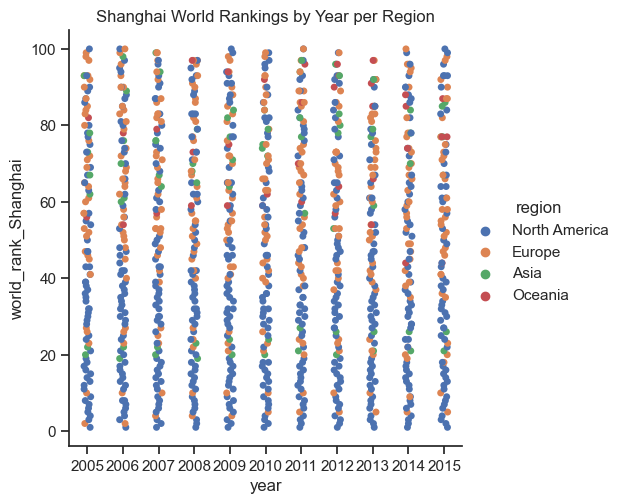

In [34]:
# Catplot for top 200

sns.set(style="ticks")
z_2 = sns.catplot(x="year", y="world_rank_Shanghai", hue="region", data=df_top100_v2).set(title = 'Shanghai World Rankings by Year per Region')

Unlike the catplot for the other datasets, this dataset has less diversity in regions (no African and South American regions). There's also much less diversity in the Asian region (no universities from China, South Korea, Hong Kong, etc.) which may be due to the fact that only the top 100 universities were selected as opposed to the top 200 for the other datasets. 

Once again, the North American region has the most universities with American universities making up the majority of them. European universities are more prevalent after the top 50, with the United Kingdom having the most universities throughout the 10 year period. 

In [35]:
# Save figure

z_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_world_rank_year_shanghai_top100.png'), bbox_inches="tight")

## 7. Revisit the questions in the previous task and write answers to those based on the exploration conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration. 

Question 1: Which countries have the most/least top universities?

USA has the most universities in the top 100 by far. Austria has the least with only 1 university. Going by region, North America has the most universities, followed by Europe and Oceania has the least amount of top 100 universities in total. 

Question 2: Do higher numbers of top universities correlate to higher general rankings of countries?

I would need to find the average ranking of universities from each country in the top 100, which I have not completed yet. This can be done in a subsequent exercise.

Question 3: Which factors, if any, were more prevalent in top universities?

This is difficult to see based on the pairplot alone. However, based on the correlation matrix it appears that HiCi and NS scores appear to be the most correlated with the Shanghai world rankings. 

Question 4: How did the rankings change over time? Did certain countries increase their numbers of
top universities? What factors caused this change?

These have not been completed yet since time analysis has not been completed. However, individual universities can be plotted over time to see how their respective rankings have changed. A more broad analysis can be done by completing value_counts of countries and see a trend over time. Finding factors for this change would be much more complicated and would need further analysis.

Question 5: How do the rankings and trends compare to those from the other datasets (Times Higher
Education World University Rankings and CWUR)?

Again, this would be difficult to complete without line charts being done for individual universities/regions. This can be done in future analysis. 

## 8. Define any hypotheses that you can at this point.

Hypothesis 1: If a university is from the Asian region, then it will have a higher average ranking compared to a university from the European Region.

Hypothesis 2: If a university is from the United States, then it will have a higher publication score on average.